# 信用情報の分析


## 【問題1】コンペティション内容の把握

コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。


#### ＜回答＞
**1. Home Creditはどのような企業？**

返済能力はあるが、取引履歴や実績がないことが理由となり、新規借り入れができないお客様へ向けて、

電話会社や取引情報などのさまざまな代替データを利用して、お客様の返済能力を予測。

統計的手法と機械学習手法を用いて、お客様の返済能力を判断し、返済可能なお客様にローンが提供されるようなサービスを展開している企業


**2. このコンペティションでは何を予測する？**

お客様の返済能力を予測


**3. それを予測することで企業が得られるメリットは何？**

借入を希望するお客様の返済能力が判断しやすくなるため、誤った融資が少なくなる


In [193]:
# 行と列の表示制限をなくすため
pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 120)
# from sklearn.datasets import load_iris
import scipy
import missingno as msno
import pandas as pd
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline


# csvをDataFrameにして変数に代入
ap_df = pd.read_csv('application_train.csv')

print(type(ap_df))

<class 'pandas.core.frame.DataFrame'>


データセットの準備

分析対象のデータセットはコンペティションのDataページからapplication_train.csvをダウンロードして使用します。


また同ページ内にあるHomeCredit_columns_description.csvは、データセットに関する説明となっています。


Dataページ内の他のcsvファイルはこの課題では扱いません。

## 【問題2】データの概観の把握


データの概観を把握するために以下のようなことを行ってください。


**1. .head()、.info()、describe()などを使う**

**2. 欠損値の有無を見る**

**3. クラスの割合がわかるグラフを描く**


それぞれ結果に対する説明や考察も行ってください。

In [194]:
# 1. .head()、.info()、describe()などを使う

# データの最初から２０列目までを表示させる
print('データの最初から２０列目までを表示させる')
display(ap_df.head(20))

print('ap_dfのtypeを表示')
print(type(ap_df))
# 特徴量のデータを表示させる
print('特徴量のデータを表示させる')
print(ap_df.info())

# 特徴量の平均、標準偏差、四分位数を一度に表示させる
print('特徴量の平均、標準偏差、四分位数を一度に表示させる')
print(ap_df.describe())


# 2. 欠損値の有無を見る
# isnull()で欠損値の有無を表示させる
print('snull()で欠損値の有無を表示させる')
display(ap_df.isnull())



データの最初から２０列目までを表示させる


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,...,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,...,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,...,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

ap_dfのtypeを表示
<class 'pandas.core.frame.DataFrame'>
特徴量のデータを表示させる
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None
特徴量の平均、標準偏差、四分位数を一度に表示させる
          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,...,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,Tr

TARGETの数順に並べ替える


0    8076
1     526
Name: TARGET, dtype: int64

1     526
0    8076
Name: TARGET, dtype: int64

支払い遅れの回数を表す　円グラフを表示


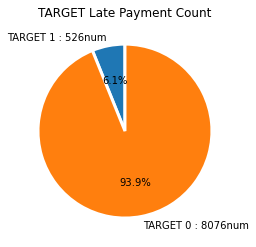

-----データをもとに考察-----
支払い遅れのあるユーザーは526人 欠損値を除いた6.１％である。


In [195]:
# 3. クラスの割合がわかるグラフを描く
# 欠損値のある行を削除 （8602行へ）
ap_df = ap_df.dropna(how="any",axis=0)

# # ターゲットの数が大きい順に並び替えて、グラフにする
ap_df_target_sort = ap_df.sort_values('TARGET',ascending=False)

print('TARGETの数順に並べ替える')
#  TARGETの中身を数順に並び替える　Seriese
ap_df_target_sort = ap_df_target_sort.loc[:,"TARGET"].value_counts()
display(ap_df_target_sort)
# 中身の順を入れ替える（多い数が先に来るように）

ap_df_target_sort = ap_df_target_sort.sort_values()
display(ap_df_target_sort)

# 円グラフのラベル用の配列(list)
print('支払い遅れの回数を表す　円グラフを表示')

# ラベル名を変数に格納
label_ta_0 = ap_df_target_sort [0]
label_ta_1 = ap_df_target_sort [1]

label = ["TARGET 1 : {}num".format(label_ta_1),"TARGET 0 : {}num".format(label_ta_0)]
plt.title("TARGET Late Payment Count") # 支払いを遅れた回数を表すグラフ
# 円グラフを表示　　グラフの開始位置を９０度に指定
plt.pie(ap_df_target_sort,labels=label,startangle=90,labeldistance=1.1,autopct="%1.1f%%",wedgeprops={'linewidth': 3, 'edgecolor':"white"})
plt.show()


print('-----データをもとに考察-----')
print('支払い遅れのあるユーザーは526人 欠損値を除いた6.１％である。')

## 【問題3】課題設定


**データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。**

### 回答

1. 支払い遅れなどのカウントのないユーザーは93.9％いるが、返済能力についてその中でデータを絞って判断する必要がある。
2. 支払い遅れのあるユーザーは全体で6.1％ほどだが、返済能力的に借入可能なユーザーもいるはずなので判断する必要がある。

## 【問題4】データ探索


問題3で設定した課題・疑問を解決するためにデータ探索を進めます。

探索で使用する表やグラフを、考察と共に **15個以上** 作成してください。


探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,...,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,463500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.009657,-15406,-892,-341.0,-4176,22.0,1,1,0,1,0,0,Laborers,2.0,2,2,MONDAY,18,0,0,0,0,0,0,Business Entity Type 3,0.270766,0.707126,0.597192,0.1464,0.1291,0.9861,0.8096,0.1080,0.04,0.0345,0.3333,0.3750,0.0000,0.1194,0.0933,0.0000,0.0000,0.1492,0.1340,...,0.1090,0.0403,0.0345,0.3333,0.3750,0.0000,0.1304,0.0972,0.0000,0.0000,0.1478,0.1291,0.9861,0.8121,0.1087,0.04,0.0345,0.3333,0.3750,0.0000,0.1214,0.0949,0.0000,0.0000,reg oper account,block of flats,0.1324,"Stone, brick",No,2.0,1.0,2.0,1.0,-2053.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,198000.0,Family,Working,Secondary / secondary special,Separated,House / apartment,0.018850,-16282,-4375,-762.0,-1494,8.0,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,11,0,0,0,0,0,0,Self-employed,0.647045,0.746486,0.739412,0.0928,0.1000,0.9801,0.7280,0.0463,0.00,0.2069,0.1667,0.2083,0.0437,0.0756,0.0903,0.0000,0.0000,0.0945,0.1038,...,0.0467,0.0000,0.2069,0.1667,0.2083,0.0447,0.0826,0.0941,0.0000,0.0000,0.0937,0.1000,0.9801,0.7316,0.0466,0.00,0.2069,0.1667,0.2083,0.0445,0.0770,0.0919,0.0000,0.0000,reg oper spec account,block of flats,0.0710,Panel,No,6.0,0.0,6.0,0.0,-1782.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.031329,-11375,-2311,-180.0,-2009,4.0,1,1,0,1,0,0,Managers,2.0,2,2,MONDAY,13,0,0,0,0,0,0,Trade: type 7,0.674832,0.616156,0.673830,0.5845,0.4570,0.9945,0.9252,0.3468,0.60,0.2414,0.9167,0.5000,0.2847,0.4287,0.7187,0.2201,0.7729,0.5956,0.4742,...,0.3500,0.6042,0.2414,0.9167,0.5000,0.2912,0.4683

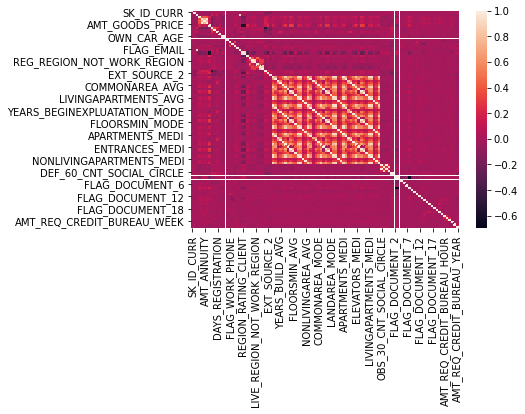

71        463500.0
124       198000.0
152       675000.0
161       238500.0
255       774000.0
            ...   
307358    274500.0
307359    675000.0
307407    643500.0
307456    270000.0
307482    472500.0
Name: AMT_GOODS_PRICE, Length: 8602, dtype: float64

71        24435.0
124       16789.5
152       53329.5
161       24781.5
255       31032.0
           ...   
307358    16051.5
307359    21906.0
307407    47673.0
307456    15075.0
307482    34969.5
Name: AMT_ANNUITY, Length: 8602, dtype: float64

In [202]:
# 欠損値を抜いたデータ
display(ap_df.head())

# 相関係数の高い組み合わせを探すためヒートマップへ！
# ヒートマップで相関係数行列を表示　
corr_ap_df = ap_df.corr()
sns.heatmap(corr_ap_df)
plt.show()

display(ap_df.loc[:,"AMT_GOODS_PRICE"],ap_df.loc[:,"AMT_ANNUITY"]) #商品の価格 * ローン年金
plt.show()

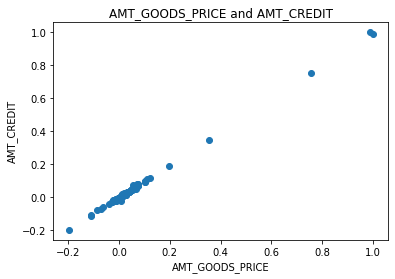

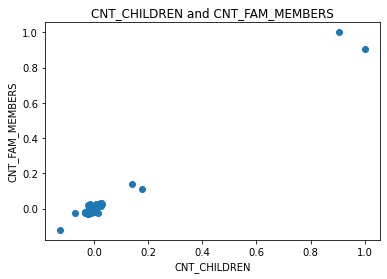

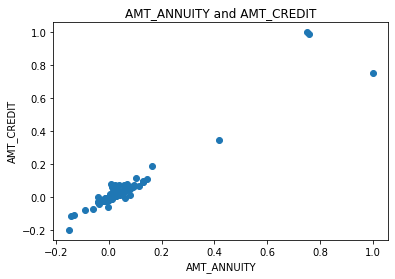

以上のデータをもとにさらに問題３の課題について絞り込む


In [198]:
# display(corr_ap_df)

# A1 以前利用していた価格と以前の最終的なクレジット価格は相関性が高い
plt.title("AMT_GOODS_PRICE and AMT_CREDIT")
plt.xlabel("AMT_GOODS_PRICE")
plt.ylabel("AMT_CREDIT")
plt.scatter(corr_ap_df.loc[:,"AMT_GOODS_PRICE"],corr_ap_df.loc["AMT_CREDIT"])
plt.show()
# A1 end

# A2 お客様のお子様の数と家族人数も相関性が高い
plt.title("CNT_CHILDREN and CNT_FAM_MEMBERS")
plt.xlabel("CNT_CHILDREN")
plt.ylabel("CNT_FAM_MEMBERS")
plt.scatter(corr_ap_df.loc[:,"CNT_CHILDREN"],corr_ap_df.loc["CNT_FAM_MEMBERS"])
plt.show()
# A2end

# クレジットビューローンクレジットの年金と最終的なクレジット価格は相関性が高い
plt.title("AMT_ANNUITY and AMT_CREDIT")
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_CREDIT")
plt.scatter(corr_ap_df.loc[:,"AMT_ANNUITY"],corr_ap_df.loc["AMT_CREDIT"])
plt.show()
# A3 end

print('以上のデータをもとにさらに問題３の課題について絞り込む')





<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
Columns: 106 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(106)
memory usage: 92.7+ KB


None

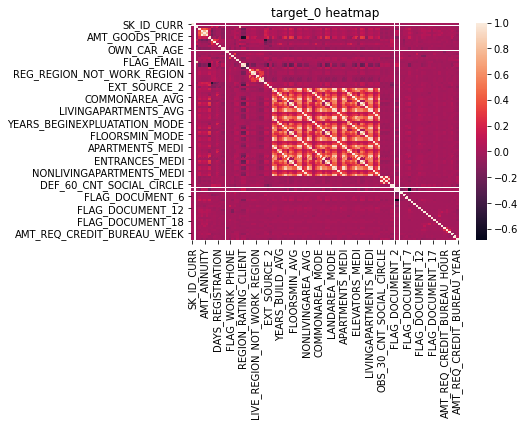

<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
Columns: 106 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(106)
memory usage: 92.7+ KB


None

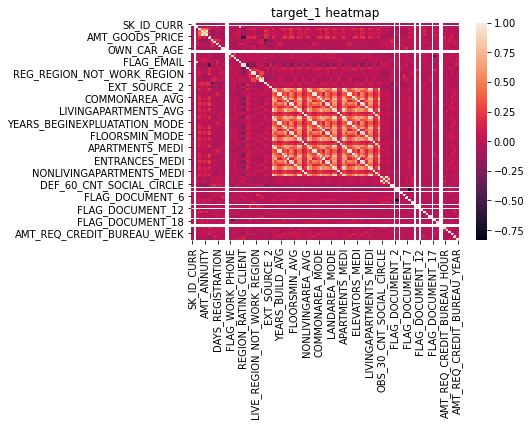

カウント1の人もカウントゼロの人どちらも、データの相関関係に違いは見られない


SK_ID_CURR                      0.000424
TARGET                               NaN
CNT_CHILDREN                    0.032256
AMT_INCOME_TOTAL               -0.181056
AMT_CREDIT                     -0.044008
AMT_ANNUITY                    -0.071601
AMT_GOODS_PRICE                -0.050658
REGION_POPULATION_RELATIVE     -0.544683
DAYS_BIRTH                      0.064757
DAYS_EMPLOYED                  -0.018260
DAYS_REGISTRATION               0.091508
DAYS_ID_PUBLISH                -0.081221
OWN_CAR_AGE                     0.055822
FLAG_MOBIL                           NaN
FLAG_EMP_PHONE                       NaN
FLAG_WORK_PHONE                -0.034098
FLAG_CONT_MOBILE                0.009749
FLAG_PHONE                      0.005434
FLAG_EMAIL                     -0.017840
CNT_FAM_MEMBERS                 0.028603
REGION_RATING_CLIENT            1.000000
REGION_RATING_CLIENT_W_CITY     0.910663
HOUR_APPR_PROCESS_START        -0.401118
REG_REGION_NOT_LIVE_REGION     -0.121084
REG_REGION_NOT_W

お客様の居住エリアについて、負の相関性の高い値が数多く見られる


In [199]:
# 
# 滞納カウントがゼロの人だけを抜き取ってap_df_target_0に格納
# 
ap_df_target_0 = ap_df.loc[ap_df["TARGET"] == int(0)]

# 滞納カウントゼロの人の相関関係行列を作成してヒートマップへ
target0_corr = ap_df_target_0.corr()
display(target0_corr.info())

# カウントゼロのヒートマップ
plt.title("target_0 heatmap")
sns.heatmap(target0_corr)
plt.show()

# 
# 滞納カウントが1の人だけを抜き取ってap_df_target_1に格納
# 
ap_df_target_1 = ap_df.loc[ap_df["TARGET"] == int(1)]
# 滞納カウントゼロの人の相関関係行列を作成してヒートマップへ
target1_corr = ap_df_target_1.corr()
display(target1_corr.info())

# カウント１のヒートマップ
plt.title("target_1 heatmap")
sns.heatmap(target1_corr)
plt.show()


print('カウント1の人もカウントゼロの人どちらも、データの相関関係に違いは見られない')

display(target1_corr.loc["REGION_RATING_CLIENT"])

print('お客様の居住エリアについて、負の相関性の高い値が数多く見られる')
# a = np.var(target)
# print(a)

# y = scipy.stats.skew(target)
# print("歪度は{}".format(y))

# z = scipy.stats.kurtosis(target)
# print(z)

支払い遅れのカウントがない人はM    4079
F    3997
Name: CODE_GENDER, dtype: int64
支払い遅れの履歴のある人はM    4079
F    3997
Name: CODE_GENDER, dtype: int64


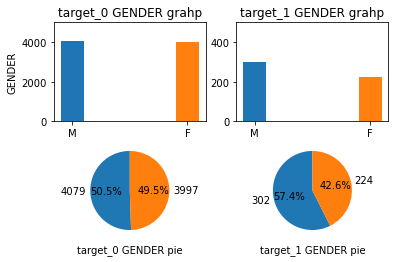

以上のデータから、支払い遅れのないクライアントの男女比はほぼ同じですが、
支払い遅れの履歴のあるクライアントでは、男性が全体の57.4％、女性が42.6％であった。
支払い遅れのあるクライアントは男性ユーザーの方が多いことがわかる


In [201]:

target_0_gen = ap_df_target_0.loc[:,"CODE_GENDER"].value_counts()
print("支払い遅れのカウントがない人は{}".format(target_0_gen))
# print(target_0_gen)
target_1_gen = ap_df_target_1.loc[:,"CODE_GENDER"].value_counts()
print("支払い遅れの履歴のある人は{}".format(target_0_gen))




fig = plt.figure()
# 生成したfigureにaxes(軸、グラフ)を生成、配置
ax1 = fig.add_subplot(2, 2, 1)# 棒グラフ
ax2 = fig.add_subplot(2, 2, 2)# 棒グラフ
ax3 = fig.add_subplot(2, 2, 3)# 円グラフ
ax4 = fig.add_subplot(2, 2, 4)# 円グラフ
# 横軸に男と女（２つのラベル）　縦軸に数を表示
# axesに描画データを設定する

# 円グラフ



# 支払い遅れのない人　男女比についてのグラフ
X = target_0_gen[0],target_0_gen[1]
Y = ["M","F"]

# 棒グラフ
ax1.bar(Y,X,width=0.2,align="center",color=["#2076B4","#FF7F0F"])
ax1.set_title("target_0 GENDER grahp")
ax1.set_ylim(bottom=0, top=5000)
ax1.set_ylabel("GENDER")

# 円グラフ
ax3.pie(X,startangle=90,autopct="%1.1f%%",labels=X)
ax3.set_xlabel("target_0 GENDER pie")



# 支払い遅れのある人　男女比についてのグラフ
X2 = target_1_gen[0],target_1_gen[1]
# 棒グラフ
ax2.bar(Y,X2,width=0.2,align="center",color=["#2076B4","#FF7F0F"])
ax2.set_title("target_1 GENDER grahp")
ax2.set_ylim(bottom=0, top=500)

#円グラフ
ax4.pie(X2,startangle=90,autopct="%1.1f%%",labels=X2)
ax4.set_xlabel("target_1 GENDER pie")

plt.show()


print('以上のデータから、支払い遅れのないクライアントの男女比はほぼ同じですが、')
print('支払い遅れの履歴のあるクライアントでは、男性が全体の57.4％、女性が42.6％であった。')
print('支払い遅れのあるクライアントは男性ユーザーの方が多いことがわかる')